In [36]:
#Part 2 Linear Regression

In [68]:
import pandas as pd #importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import figure
import pickle #import pickle library

figure(figsize=(18, 6), dpi=80)


<Figure size 1440x480 with 0 Axes>

<Figure size 1440x480 with 0 Axes>

In [38]:
df = pd.read_csv('datasets/diamond.csv')#read in diamond dataset
df=df.dropna()#drop columns with null values
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]#drop index column

main_statistics=df.describe()#show main statistics of the dataset
print(main_statistics)

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


In [39]:
#converting qualitative to categorical
df['cut'] = pd.Categorical(df['cut'])
df['color'] = pd.Categorical(df['color'])
df['clarity'] = pd.Categorical(df['clarity'])
df['cut']=df['cut'].cat.codes
df['color']=df['color'].cat.codes
df['clarity']=df['clarity'].cat.codes
print(df.head)

<bound method NDFrame.head of        carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2       0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3       0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>


In [40]:
#normalize data
df_n = df
mini = df_n.min()
maxi = df_n.max()

df_n = (df_n-mini)/(maxi-mini)

bias=df_n.shape[0]*[1]

features = df_n[['carat','cut','color','clarity','depth','table','x','y','z']]
features.insert(loc=0, column='price', value=df[['price']])
    
print(features)



       price     carat   cut     color   clarity     depth     table  \
0        326  0.006237  0.50  0.166667  0.428571  0.513889  0.230769   
1        326  0.002079  0.75  0.166667  0.285714  0.466667  0.346154   
2        327  0.006237  0.25  0.166667  0.571429  0.386111  0.423077   
3        334  0.018711  0.75  0.833333  0.714286  0.538889  0.288462   
4        335  0.022869  0.25  1.000000  0.428571  0.563889  0.288462   
...      ...       ...   ...       ...       ...       ...       ...   
53935   2757  0.108108  0.50  0.000000  0.285714  0.494444  0.269231   
53936   2757  0.108108  0.25  0.000000  0.285714  0.558333  0.230769   
53937   2757  0.103950  1.00  0.000000  0.285714  0.550000  0.326923   
53938   2757  0.137214  0.75  0.666667  0.428571  0.500000  0.288462   
53939   2757  0.114345  0.50  0.000000  0.428571  0.533333  0.230769   

              x         y         z  
0      0.367784  0.067572  0.076415  
1      0.362197  0.065195  0.072642  
2      0.377095  0.06

In [41]:
df_view = df#create copy for convenient plots 
print(df_view.head())
df_view = np.array(df_view.values,'float')

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75


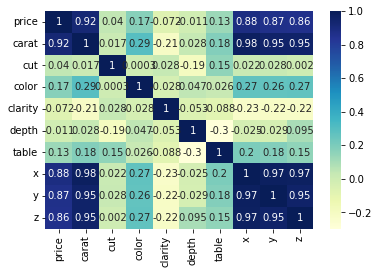

In [42]:
#generate correlation heatmap to show most important features 
dataplot = sb.heatmap(features.corr(), cmap="YlGnBu", annot=True)

Text(0, 0.5, 'Price')

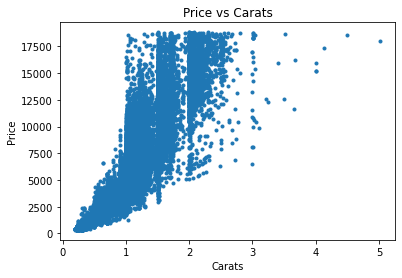

In [43]:
plt.scatter(df_view[:,0],df_view[:,6],marker='.') #plotting price vs the carats
plt.title('Price vs Carats')
plt.xlabel('Carats')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

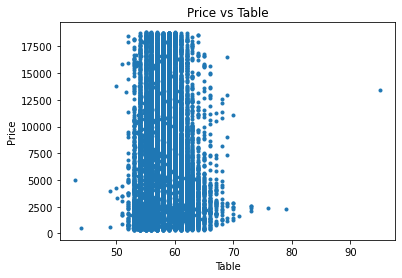

In [44]:
plt.scatter(df_view[:,5],df_view[:,6],marker='.') #plotting price vs the table value
plt.title('Price vs Table')
plt.xlabel('Table')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

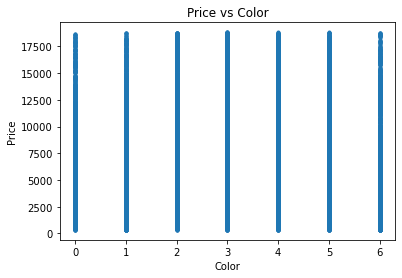

In [45]:
plt.scatter(df_view[:,2],df_view[:,6],marker='.') #plotting color categorical values with the price
plt.title('Price vs Color')
plt.xlabel('Color')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

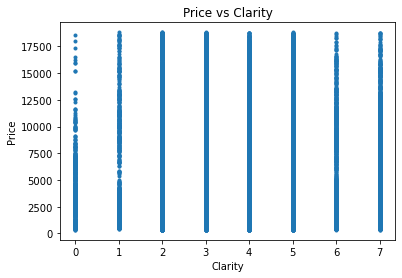

In [46]:
plt.scatter(df_view[:,3],df_view[:,6],marker='.') #plotting clarity categorical values with the price
plt.title('Price vs Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')

Text(0.5, 1.0, 'X')

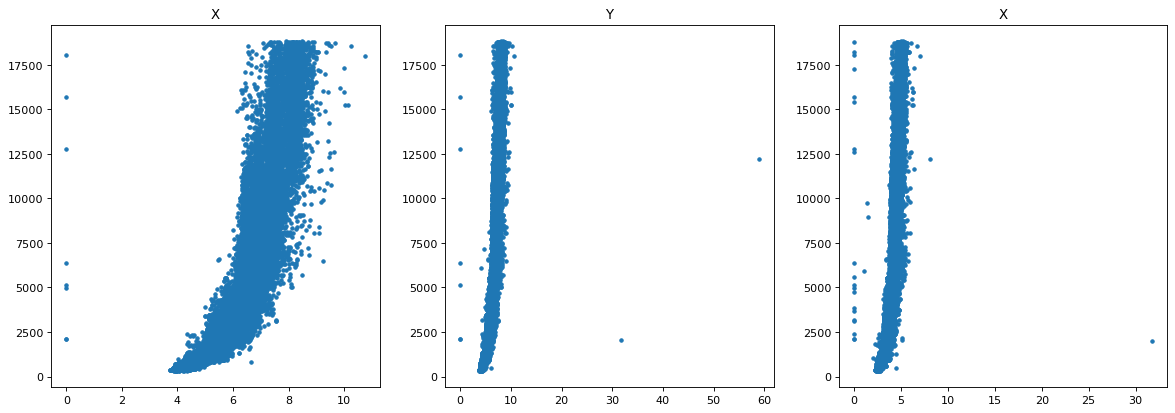

In [47]:
figure(figsize=(18, 6), dpi=80)
plt.subplot(1,3,1)
plt.scatter(df_view[:,7],df_view[:,6],marker='.') #plotting the price vs X
plt.title('X')

plt.subplot(1,3,2)
plt.scatter(df_view[:,8],df_view[:,6],marker='.') #plotting the price vs Y
plt.title('Y')

plt.subplot(1,3,3)
plt.scatter(df_view[:,9],df_view[:,6],marker='.') #plotting the price vs z
plt.title('X')


In [48]:
features.insert(loc=1, column='bias', value=bias) #include a bias value in data
features = np.array(features.values,'float') #convert data to numpy array

In [49]:
np.random.shuffle(features) #shuffle the data

X = features[:,1:] #split into predictors and target (the target being diamond price)
y = features[:,0]

print(y.shape,X.shape)

train_size = int(0.8*(y.shape[0])) #set the training size

y_train = y[:train_size]#Split X and y into training and test sets
y_test = y[train_size:]


X_train = X[:train_size]
X_test = X[train_size:]

print(y_train.shape,y_test.shape,X_train.shape,X_test.shape) #show size of each data array

(53940,) (53940, 10)
(43152,) (10788,) (43152, 10) (10788, 10)


In [50]:
class LinearReg():#Linear Regression class
    def __init__(self) -> None:
        pass
    
    def train(self, x, y):#set the weights for the model
        self.weights = np.linalg.inv(x.T@x)@x.T@y
        return self.weights
    
    def predict(self, x, y):
        y_pred = []
        
        for i in x:#predict the y_value for each test value
            y_pred.append(self.weights.T@i)

        list(y)

        mse = 0
        for i,j in zip(y, y_pred):#calculate the mse for each value
            mse += (i - j)**2

        mse /= len(y)#divide the sum of MSE's by the number of test points
        
        self.loss(x,y)
        return y_pred, mse #return predictions and mse
    def loss(self,x,y):
        self.loss_val = 1/2*np.sum((y-x@self.weights).T@(y-x@self.weights))

In [51]:
Linear_model = LinearReg() #intialize the Linear Regression model

In [52]:
print(Linear_model.train(X_train,y_train)) #show the weights of the model from the training data

[  7675.12003312  53303.66776458    274.28993076  -1583.83213665
   2009.78464404  -5479.88297123  -4786.18610583 -12908.62117843
   1578.50848898   -355.17582536]


In [53]:
y_pred, mse = Linear_model.predict(X_test,y_test)#predict on the test values

In [54]:
linear_loss = Linear_model.loss_val
print(linear_loss)#show total loss of linear model

10768992919.05511


In [55]:
one2one = np.linspace(0,20000)#set a test line to plot against

Text(0.5, 1.0, 'Multi-Linear Regression Price Prediction\nMSE 1996476')

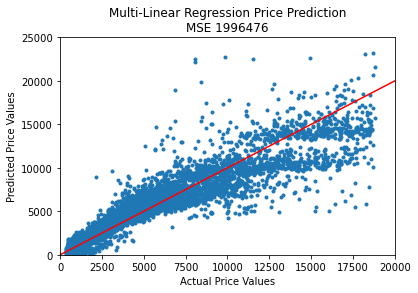

In [56]:
plt.scatter(y_test,y_pred,marker='.')#plotting the predicted price vs the actual price
plt.plot(one2one,one2one,"r-")

plt.xlim([0, 20000])
plt.ylim([0, 25000])

plt.xlabel('Actual Price Values')
plt.ylabel('Predicted Price Values')

plt.title(f'Multi-Linear Regression Price Prediction\nMSE {mse:.0f}' )

In [69]:
with open('ylin254_cicloss_assignment1_part2.pickle', 'wb') as handle:
    pickle.dump(Linear_model.weights, handle, protocol=pickle.HIGHEST_PROTOCOL) #save model weights to a pickle file

In [57]:
#Part 3: Ridge Regression
#data is the same as Linear Regression, so refer to above if needed

In [58]:
class RidgeReg():
    def __init__(self) -> None:
        self.lambdas = [0.0001,0.001, 0.005,0.01, .05,0.1 ,.5, 1,5, 10,50, 100,500] #setting a vector of lambdas to test
    
    def train(self, x, y):
        self.weights = []
        for l in self.lambdas: #calculating the weights for each value of lambda
            self.weights.append(np.linalg.inv(x.T@x+l*np.identity(x.shape[1]))@x.T@y)

    def predict(self, x, y):
        lowest_mse = np.inf#set an initial 'low' mse
        mses = []
        count = 0
        for w in self.weights:#for each set of weights
            y_pred = []
            
            for i in x:
                y_pred.append(w.T@i)#calculate the prediciton

            list(y)
            mse = 0
            for i,j in zip(y, y_pred):#calculated the mses
                mse += (i - j)**2

            mse /= len(y)
            mses.append(mse)

            if mse < lowest_mse:#keep track of the set of weights with the lowest mse, and what lamdba was used
                lowest_mse = mse
                best_lambda = self.lambdas[count]
                best_weights = w
                y_best = y_pred
                
            count+=1
        
        self.L = best_lambda
        self.weights = best_weights
        
        self.loss(x,y)
        
        return best_weights, y_best, lowest_mse, best_lambda 
    def loss(self,x,y):
        self.loss_val = 1/2*np.sum((y-x@self.weights).T@(y-x@self.weights)+1/2*self.L*self.weights.T@self.weights)
        

In [59]:
ridge = RidgeReg() #initialize a ridge regresison model

In [60]:
ridge.train(X_train,y_train) #train the model

In [61]:
weights_r,y_pred_r, mse_r, L = ridge.predict(X_test,y_test)#run the prediciton on the model

In [62]:
ridge_loss = ridge.loss_val
print(ridge_loss)#total loss of ridge regression

11119246170.561674


In [63]:
print(mse,mse_r) #show LinearReg mse vs RidgeReg mse

1996476.2549230729 1994530.7075337882


In [64]:
print(linear_loss,ridge_loss) #show LinearReg loss vs RidgeReg loss

10768992919.05511 11119246170.561674


Text(0.5, 1.0, 'Ridge Regression Price Prediction\nMSE 1994531')

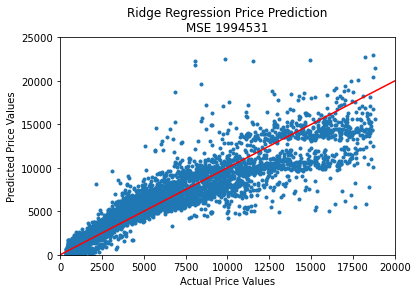

In [65]:
plt.scatter(y_test,y_pred_r,marker='.')#plot predicted price vs actual price
plt.plot(one2one,one2one,"r-")

plt.xlim([0, 20000])
plt.ylim([0, 25000])

plt.xlabel('Actual Price Values')
plt.ylabel('Predicted Price Values')

plt.title(f'Ridge Regression Price Prediction\nMSE {mse_r:.0f}')

Text(0.5, 1.0, 'Ridge Regression\nMSE 1994531')

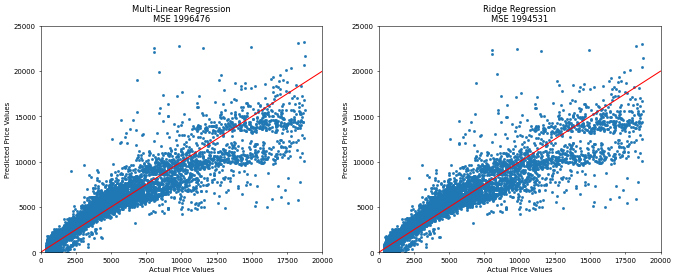

In [66]:
#for comparison, plot both next to each other

figure(figsize=(16, 6), dpi=50)

plt.subplot(1,2,1)
plt.scatter(y_test,y_pred,marker='.')
plt.plot(one2one,one2one,"r-")

plt.xlim([0, 20000])
plt.ylim([0, 25000])

plt.xlabel('Actual Price Values')
plt.ylabel('Predicted Price Values')

plt.title(f'Multi-Linear Regression\nMSE {mse:.0f}' )


plt.subplot(1,2,2)

plt.scatter(y_test,y_pred_r,marker='.')
plt.plot(one2one,one2one,"r-")

plt.xlim([0, 20000])
plt.ylim([0, 25000])

plt.xlabel('Actual Price Values')
plt.ylabel('Predicted Price Values')

plt.title(f'Ridge Regression\nMSE {mse_r:.0f}')

In [70]:
with open('ylin254_cicloss_assignment1_part3.pickle', 'wb') as handle:
    pickle.dump(weights_r, handle, protocol=pickle.HIGHEST_PROTOCOL) #save model weights to a pickle file